In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None


In [ ]:
home=pd.read_csv(r"/content/ML Linear Regression Home Price Prediction & Analysis Project  Resource16932049360.csv")

In [ ]:
home.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
27929,Maidstone,9A Montgomery St,3,h,802000.0,S,Nelson,18/11/2017,6.4,3012.0,3.0,2.0,2.0,NaN,NaN,NaN,Maribyrnong City Council,-37.78840,144.86520,Western Metropolitan,3873.0
8106,Preston,19 Malpas St,4,h,1004000.0,S,Nelson,03/09/2016,8.8,3072.0,3.0,0.0,0.0,650.0,NaN,NaN,Darebin City Council,-37.73460,145.02260,Northern Metropolitan,14577.0
18693,Preston,1/33 Spring St,2,t,650000.0,SP,RW,15/07/2017,8.4,3072.0,NaN,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,14577.0
26941,Croydon,6/60 Beauford Rd,2,u,590000.0,SP,Philip,11/11/2017,23.0,3136.0,NaN,NaN,NaN,NaN,NaN,NaN,Maroondah City Council,NaN,NaN,Eastern Metropolitan,11925.0
24675,Richmond,205 Punt Rd,3,h,1100000.0,SP,Jellis,14/10/2017,2.4,3121.0,3.0,2.0,0.0,190.0,156.0,1900.0,Yarra City Council,-37.81852,144.99008,Northern Metropolitan,14949.0


In [ ]:
home.shape

(34857, 21)

In [ ]:
home.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [ ]:
(home.isnull().mean())*100 #here most of null value are above 5% null so we can't remove

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,21.832057
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.002869
Postcode,0.002869


In [ ]:
home.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
home.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#Fill All Null Value

home["Bedroom2"]=home["Bedroom2"].fillna(home["Bedroom2"].median())

home["Bathroom"]=home["Bathroom"].fillna(home["Bathroom"].median())

home["Car"]=home["Car"].fillna(home["Car"].median())

home["Landsize"]=home["Landsize"].fillna(home["Landsize"].median())

home["BuildingArea"]=home["BuildingArea"].fillna(home["BuildingArea"].median())

home["YearBuilt"]=home["YearBuilt"].fillna(home["YearBuilt"].median())

home["Lattitude"]=home["Lattitude"].fillna(home["Lattitude"].median())

home["Lattitude"]=home["Lattitude"].fillna(home["Lattitude"].median())

home["Longtitude"]=home["Longtitude"].fillna(home["Longtitude"].median())

home["Regionname"]=home["Regionname"].fillna(home["Regionname"].mode()[0])

home["Propertycount"]=home["Propertycount"].fillna(home["Propertycount"].median())

home["Price"]=home["Price"].fillna(home["Price"].median())

home["Distance"]=home["Distance"].fillna(home["Distance"].median())

home["Postcode"]=home["Postcode"].fillna(home["Postcode"].median())

home["CouncilArea"]=home["CouncilArea"].fillna(home["CouncilArea"].mode()[0])

(home.isnull().mean())*100

,0
Suburb,0.0
Address,0.0
Rooms,0.0
Type,0.0
Price,0.0
Method,0.0
SellerG,0.0
Date,0.0
Distance,0.0
Postcode,0.0


In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
home["Rooms"].value_counts()

,count
Rooms,
3,15084
2,8332
4,7956
5,1737
1,1479
6,204
7,32
8,19
10,6


Text(0.5, 1.0, 'Max Number of Rooms')

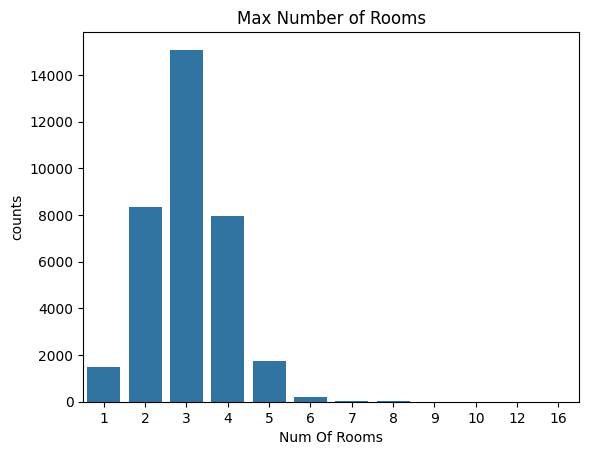

In [ ]:
#using countplot get max rooms property

sns.countplot(data=home,x="Rooms")
plt.xlabel("Num Of Rooms")
plt.ylabel("counts")
plt.title("Max Number of Rooms")

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
home["Type"].value_counts()

,count
Type,
h,23980
u,7297
t,3580


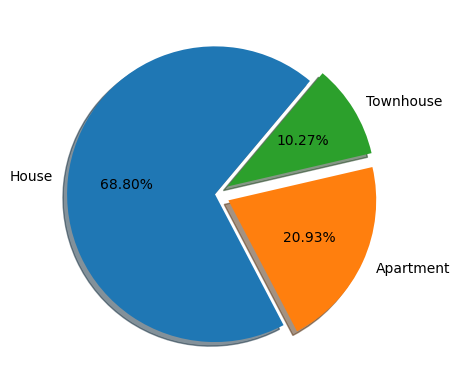

In [ ]:
#Create Pie For Analysis how many type of property available
size=[23980,7297,3580]
labels=["House","Apartment","Townhouse"]
plt.pie(x=size,labels=labels,autopct="%0.2f%%",shadow=True,explode=[0,0.1,0.1],startangle=50)
plt.show()

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          34857 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34857 non-null  float64
 9   Postcode       34857 non-null  float64
 10  Bedroom2       34857 non-null  float64
 11  Bathroom       34857 non-null  float64
 12  Car            34857 non-null  float64
 13  Landsize       34857 non-null  float64
 14  BuildingArea   34857 non-null  float64
 15  YearBuilt      34857 non-null  float64
 16  CouncilArea    34857 non-null  object 
 17  Lattitude      34857 non-null  float64
 18  Longti

In [ ]:
home["Bedroom2"].value_counts()

,count
Bedroom2,
3.0,20098
4.0,6348
2.0,5777
5.0,1427
1.0,966
6.0,168
7.0,30
0.0,17
8.0,13


Text(0.5, 1.0, 'Num Of Bedrooms In Propertys')

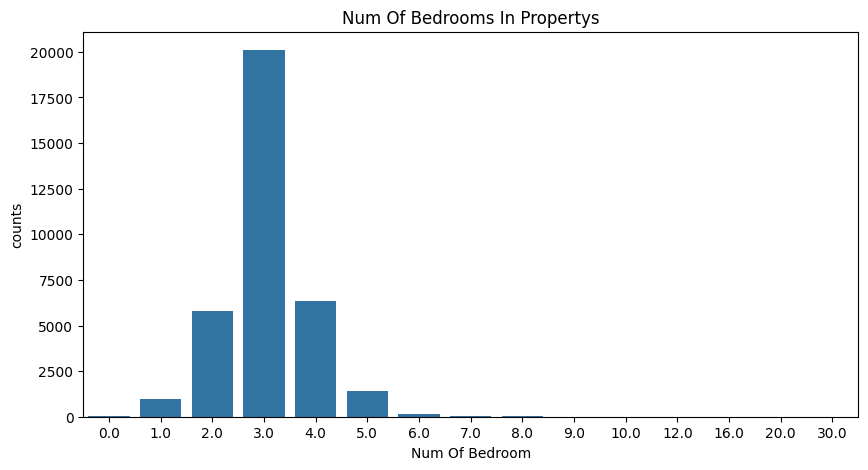

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(data=home,x="Bedroom2")
plt.xlabel("Num Of Bedroom")
plt.ylabel("counts")
plt.title("Num Of Bedrooms In Propertys")

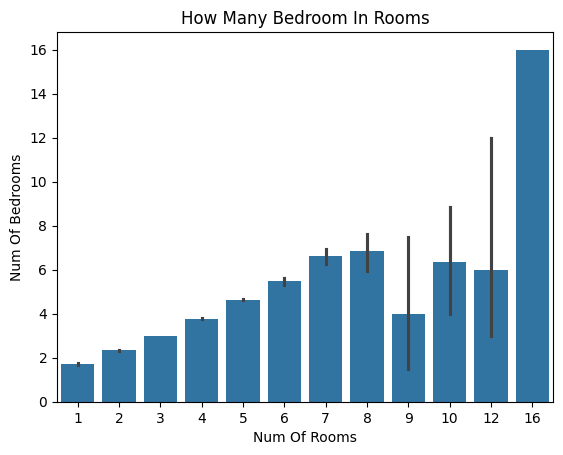

In [ ]:

sns.barplot(data=home,x="Rooms",y="Bedroom2")
plt.xlabel("Num Of Rooms")
plt.ylabel("Num Of Bedrooms")
plt.title("How Many Bedroom In Rooms")
plt.show()

Text(0.5, 1.0, 'Max Num Of Bathroom')

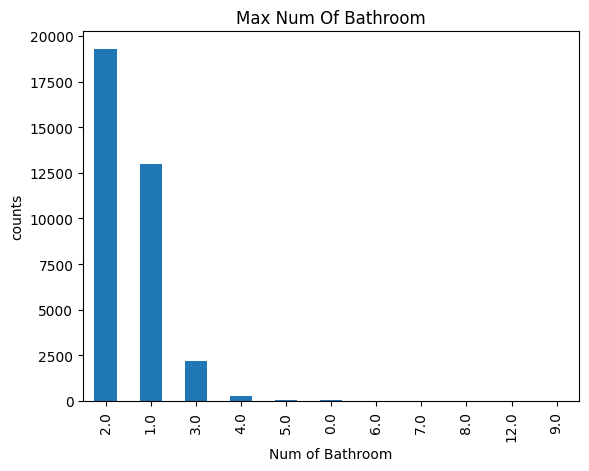

In [ ]:
home["Bathroom"].value_counts().plot(kind="bar")
plt.xlabel("Num of Bathroom")
plt.ylabel("counts")
plt.title("Max Num Of Bathroom")

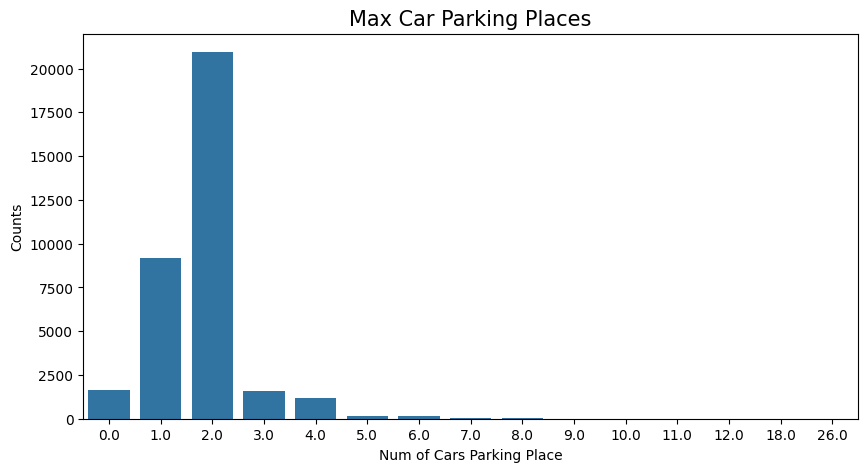

In [ ]:
#get importmmaion how many property provided max number of car parking place

plt.figure(figsize=[10,5])
sns.countplot(x=home["Car"])
plt.xlabel("Num of Cars Parking Place",fontsize=10)
plt.ylabel("Counts",fontsize=10)
plt.title("Max Car Parking Places",fontsize=15)
plt.show()

In [ ]:
home["Regionname"].value_counts()

,count
Regionname,
Southern Metropolitan,11839
Northern Metropolitan,9557
Western Metropolitan,6799
Eastern Metropolitan,4377
South-Eastern Metropolitan,1739
Eastern Victoria,228
Northern Victoria,203
Western Victoria,115


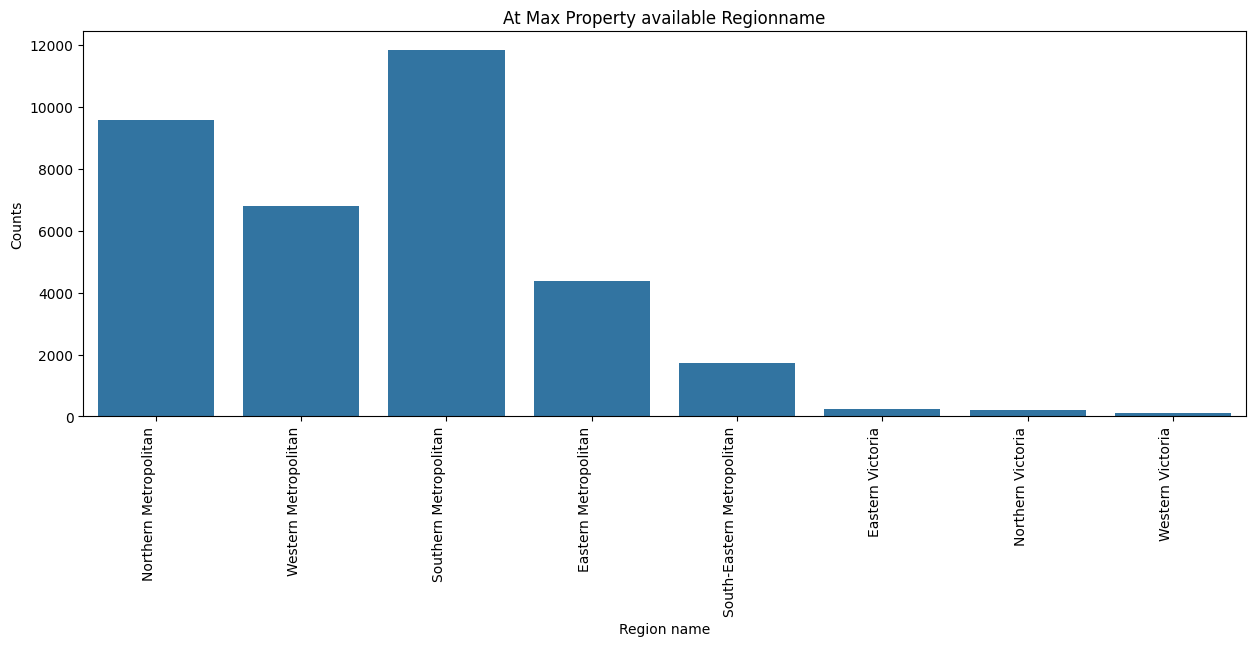

In [ ]:
# regions name where max property  are available
plt.figure(figsize=[15,5])
sns.countplot(data=home,x=home["Regionname"])
plt.title("At Max Property available Regionname")
plt.xlabel("Region name")
plt.ylabel("Counts")
plt.xticks(rotation=90, ha="right")
plt.show()

In [ ]:
home.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19723,Werribee,13b Kingfisher Ct,3,u,394000.0,PI,hockingstuart,29/07/2017,14.7,3030.0,3.0,2.0,4.0,287.0,137.0,2013.0,Wyndham City Council,-37.87895,144.67070,Western Metropolitan,16166.0
7740,Pascoe Vale,272 Sussex St,3,h,670000.0,S,hockingstuart,25/02/2017,9.9,3044.0,3.0,1.0,1.0,596.0,145.0,1949.0,Moreland City Council,-37.72100,144.95140,Northern Metropolitan,7485.0
22928,Balwyn North,6 Aquila St,5,h,3000000.0,VB,Marshall,26/08/2017,9.7,3104.0,5.0,4.0,2.0,830.0,136.0,1970.0,Boroondara City Council,-37.78739,145.07389,Southern Metropolitan,7809.0
19604,Northcote,5 Lees St,2,h,870000.0,SN,Barry,29/07/2017,5.3,3070.0,2.0,1.0,1.0,374.0,102.0,1935.0,Darebin City Council,-37.77836,145.00897,Northern Metropolitan,11364.0
6327,Malvern,36 Hunter St,4,h,870000.0,S,hockingstuart,30/07/2016,7.4,3144.0,4.0,2.0,2.0,637.0,136.0,1970.0,Stonnington City Council,-37.86790,145.03680,Southern Metropolitan,4675.0


In [ ]:
home["Rooms"].value_counts()

,count
Rooms,
3,15084
2,8332
4,7956
5,1737
1,1479
6,204
7,32
8,19
10,6


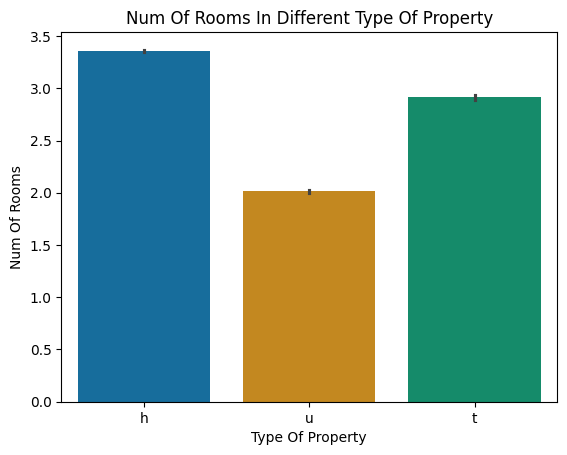

In [ ]:
sns.barplot(data=home,x="Type",y="Rooms", palette = 'colorblind')
plt.xlabel("Type Of Property")
plt.ylabel("Num Of Rooms")
plt.title("Num Of Rooms In Different Type Of Property")
plt.show()

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
home["Distance"].value_counts()

,count
Distance,
11.2,1420
13.8,681
9.2,665
7.8,662
10.5,660
...,...
31.4,1
22.9,1
33.0,1


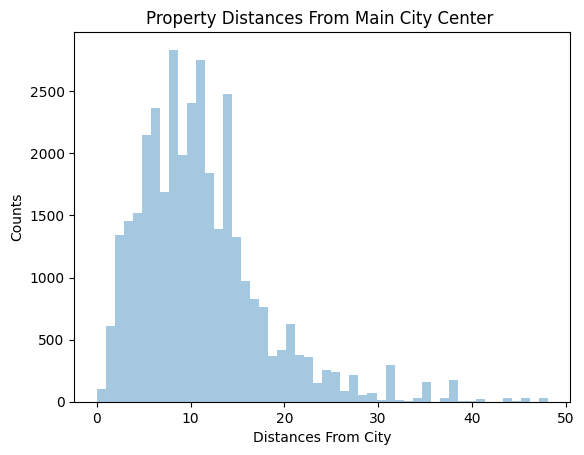

In [ ]:
sns.distplot(x=home["Distance"],bins=50,kde=False)
plt.xlabel("Distances From City")
plt.ylabel("Counts")
plt.title("Property Distances From Main City Center ")
plt.show()

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


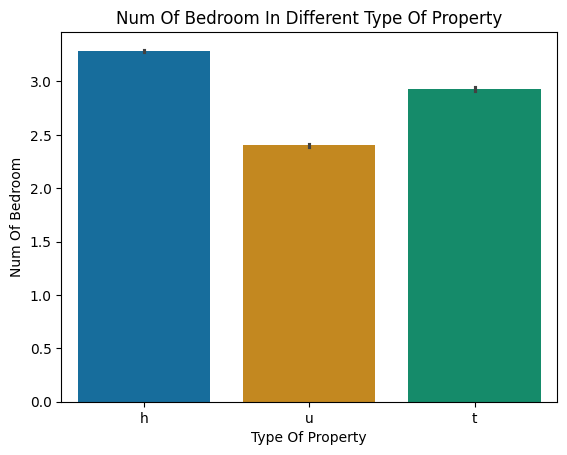

In [ ]:
sns.barplot(data=home,x="Type",y="Bedroom2", palette = 'colorblind')
plt.xlabel("Type Of Property")
plt.ylabel("Num Of Bedroom")
plt.title("Num Of Bedroom In Different Type Of Property")
plt.show()

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
home["Suburb"].value_counts()

,count
Suburb,
Reservoir,844
Bentleigh East,583
Richmond,552
Glen Iris,491
Preston,485
...,...
Belgrave,1
Cranbourne East,1
Yarra Glen,1


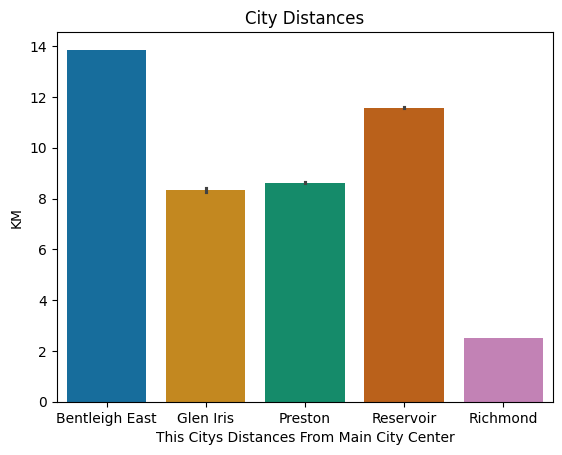

In [ ]:
local_city=["Reservoir","Bentleigh East","Richmond","Glen Iris","Preston"]

new_data=home.loc[home["Suburb"].isin(local_city) & home["Distance"]]

sns.barplot(data=new_data,x="Suburb",y="Distance",palette = 'colorblind')
plt.xlabel("This Citys Distances From Main City Center")
plt.ylabel("KM")
plt.title("City Distances")
plt.show()

In [ ]:
home["Landsize"].value_counts()

,count
Landsize,
521.0,11829
0.0,2437
650.0,204
697.0,123
585.0,97
...,...
1403.0,1
1647.0,1
1276.0,1


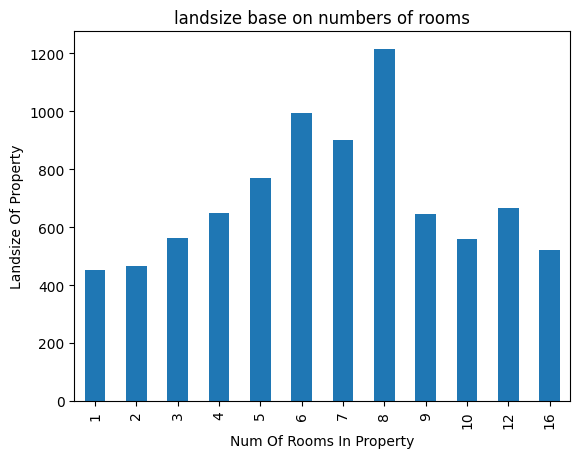

In [ ]:
#landsize base on numbers of rooms

home.groupby("Rooms")["Landsize"].mean().plot(kind="bar")
plt.xlabel("Num Of Rooms In Property")
plt.ylabel("Landsize Of Property")
plt.title("landsize base on numbers of rooms")
plt.show()

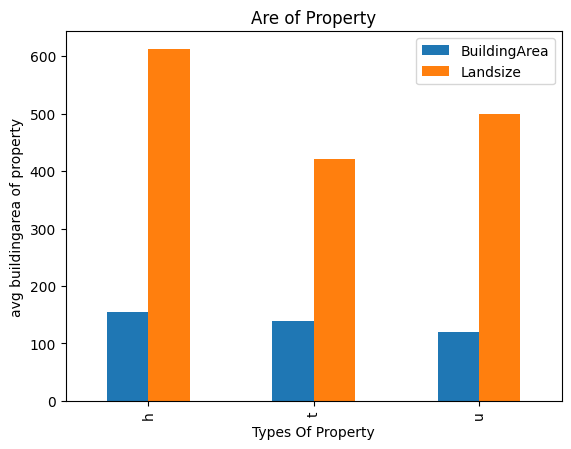

In [ ]:
home.groupby("Type")[["BuildingArea","Landsize"]].mean().plot(kind="bar")
plt.xlabel("Types Of Property")
plt.ylabel("avg buildingarea of property")
plt.title("Are of Property")
plt.show()

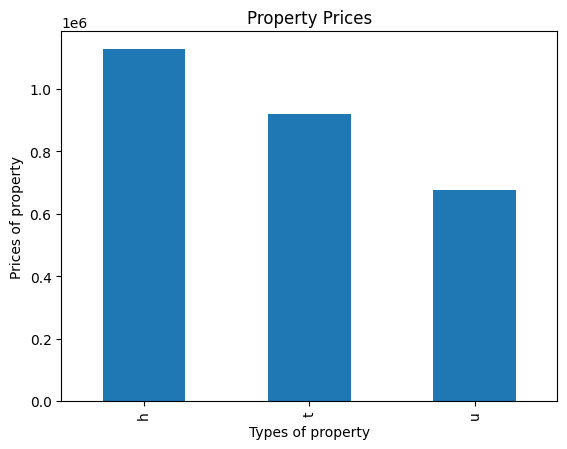

In [ ]:
# property price base on type of property
home.groupby("Type")["Price"].mean().plot(kind="bar")
plt.xlabel("Types of property")
plt.ylabel("Prices of property")
plt.title("Property Prices")
plt.show()

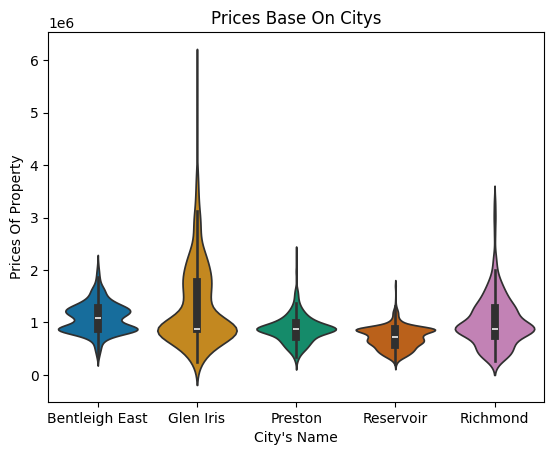

In [ ]:
# property prices base on top near citys
local_city=["Reservoir","Bentleigh East","Richmond","Glen Iris","Preston"]

new_data=home.loc[home["Suburb"].isin(local_city) & home["Price"]]

sns.violinplot(data=new_data,x="Suburb",y="Price",palette = 'colorblind')
plt.xlabel("City's Name")
plt.ylabel("Prices Of Property")
plt.title("Prices Base On Citys")
plt.show()

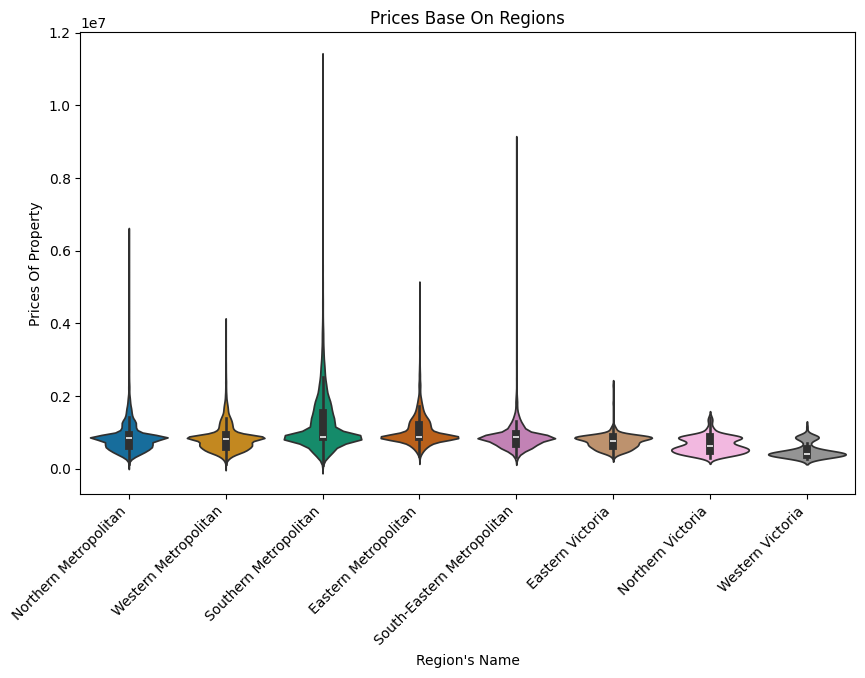

In [ ]:
#property prices base on regions
plt.figure(figsize=[10,6])
sns.violinplot(data=home,x="Regionname",y="Price",palette = 'colorblind')
plt.xlabel("Region's Name")
plt.ylabel("Prices Of Property")
plt.title("Prices Base On Regions")
plt.xticks(rotation=45, ha="right")

plt.show()

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          34857 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34857 non-null  float64
 9   Postcode       34857 non-null  float64
 10  Bedroom2       34857 non-null  float64
 11  Bathroom       34857 non-null  float64
 12  Car            34857 non-null  float64
 13  Landsize       34857 non-null  float64
 14  BuildingArea   34857 non-null  float64
 15  YearBuilt      34857 non-null  float64
 16  CouncilArea    34857 non-null  object 
 17  Lattitude      34857 non-null  float64
 18  Longti

In [ ]:
import datetime as dt

new= dt.datetime.now()

In [ ]:
new

datetime.datetime(2025, 2, 12, 7, 27, 5, 555113)

In [ ]:
home["Sold_Year"]=home["Date"].apply(lambda x: x.split('/')[2]).astype(float)

In [ ]:
home["Sold_Date"]=home["Date"].apply(lambda x: x.split('/')[0]).astype(int)


In [ ]:
home["Sold_Month"]=home["Date"].apply(lambda x: x.split('/')[1]).astype(int)


In [ ]:
home

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_Year,Sold_Date,Sold_Month
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016.0,3,9
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016.0,3,12
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016.0,4,2
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016.0,4,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,136.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018.0,24,2
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018.0,24,2
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018.0,24,2
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,3.0,2.0,2.0,521.0,136.0,1970.0,Maribyrnong City Council,-37.80760,145.00780,Western Metropolitan,6543.0,2018.0,24,2


In [ ]:
home.drop("Date",axis=1,inplace=True)

In [ ]:
home

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_Year,Sold_Date,Sold_Month
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016.0,3,9
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016.0,3,12
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016.0,4,2
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016.0,4,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,6.3,3013.0,4.0,1.0,3.0,593.0,136.0,1970.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018.0,24,2
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018.0,24,2
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018.0,24,2
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,6.3,3013.0,3.0,2.0,2.0,521.0,136.0,1970.0,Maribyrnong City Council,-37.80760,145.00780,Western Metropolitan,6543.0,2018.0,24,2


In [ ]:
 home["Old_years_house"]=home["Sold_Year"]-home["YearBuilt"]

In [ ]:
 home["Old_years_house"]= home["Old_years_house"].astype(int)

In [ ]:
home.rename({"Old_years_house":"Property_old_years"},axis=1,inplace=True)

In [ ]:
home.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_Year,Sold_Date,Sold_Month,Property_old_years
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.0,3,9,46
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.0,3,12,46
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.0,4,2,116
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.0,4,2,46
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.0,4,3,117


In [ ]:
home["Method"].value_counts()

,count
Method,
S,19744
SP,5095
PI,4850
VB,3108
SN,1317
PN,308
SA,226
W,173
SS,36


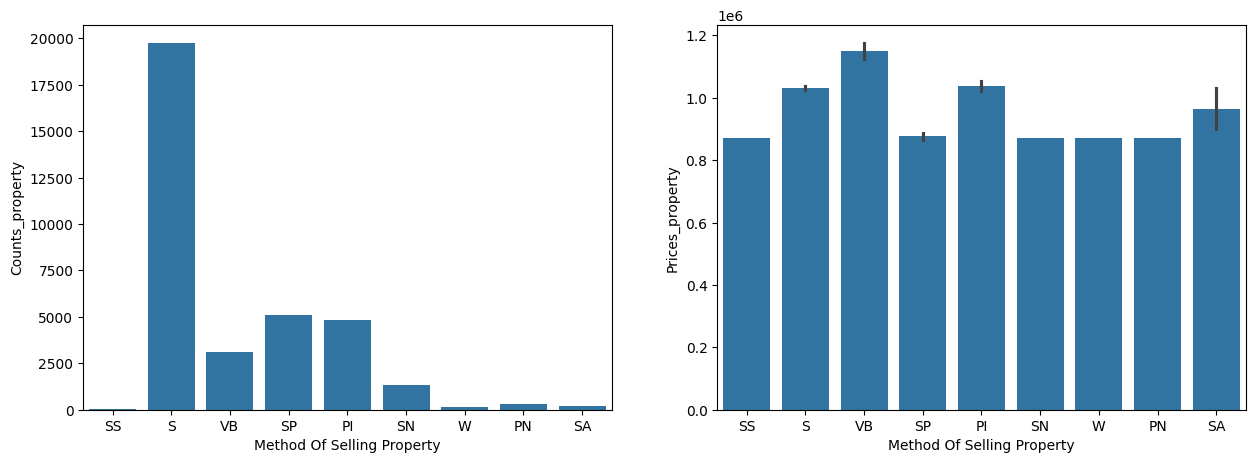

In [ ]:
#S: Sold at auction or directly to a buyer.
#SP: Sold before the auction.
#PI: Didn’t sell at the auction, but talks continued.
#VB: Seller made a bid during the auction.
#SA: Sold later, after the auction or further discussions.

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=home,x="Method")
plt.xlabel("Method Of Selling Property")
plt.ylabel("Counts_property")

plt.subplot(1,2,2)
sns.barplot(data=home,x="Method",y="Price")
plt.xlabel("Method Of Selling Property")
plt.ylabel("Prices_property")
plt.show()

In [ ]:
#these is the data of property which has 3 rooms with price
home[home["Rooms"]==3][["Type","Bedroom2","Bathroom","Price"]]

,Type,Bedroom2,Bathroom,Price
3,u,3.0,2.0,870000.0
4,h,3.0,2.0,1465000.0
5,h,3.0,2.0,850000.0
11,h,4.0,2.0,1876000.0
15,h,3.0,2.0,1000000.0
...,...,...,...,...
34847,h,3.0,2.0,500000.0
34849,h,3.0,2.0,570000.0
34850,h,3.0,2.0,870000.0
34851,h,3.0,1.0,1101000.0


In [ ]:
#this the one property has 16 bedrooms with price
home[home["Rooms"]==16][["Type","Bedroom2","Bathroom","Price"]]

,Type,Bedroom2,Bathroom,Price
26210,h,16.0,8.0,5000000.0


In [ ]:
home["Property_old_years"].value_counts()

,count
Property_old_years,
47,12211
46,5481
48,3166
57,699
67,542
...,...
135,1
186,1
-90,1


In [ ]:
# this property data those are 10 years old from bulding to sold

home[home["Property_old_years"]==10][["Address","Type","Price"]]

,Address,Type,Price
7,16 Maugie St,h,870000.0
387,11/17 Myamyn St,u,3625000.0
411,7/17 Myamyn St,u,870000.0
630,6a Glen Rd,h,1662000.0
860,22 Yongala St,h,2250000.0
...,...,...,...
34189,13 Kossatz Tce,h,670000.0
34218,16 Dunolly St,h,681000.0
34261,2A Olive Gr,h,600000.0
34492,99 Waterview Dr,h,615000.0


In [ ]:
#this property too near from city center
home[home["Distance"]<=5][["Type","Rooms","Car","Price"]]

,Type,Rooms,Car,Price
0,h,2,1.0,870000.0
1,h,2,1.0,1480000.0
2,h,2,0.0,1035000.0
3,u,3,1.0,870000.0
4,h,3,0.0,1465000.0
...,...,...,...,...
34799,h,3,2.0,870000.0
34829,u,3,2.0,870000.0
34830,t,3,2.0,1150000.0
34844,u,1,2.0,440000.0


In [ ]:
home.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_Year,Sold_Date,Sold_Month,Property_old_years
15358,Warrandyte,29 Lynette Av,4,h,850000.0,SP,Philip,21.1,3113.0,3.0,2.0,2.0,521.0,136.0,1970.0,Manningham City Council,-37.80760,145.00780,Eastern Metropolitan,2003.0,2017.0,3,6,47
17028,Heidelberg Heights,1/171 Waiora Rd,3,u,630000.0,VB,Miles,8.8,3081.0,3.0,1.0,1.0,277.0,136.0,1970.0,Banyule City Council,-37.73426,145.05986,Eastern Metropolitan,2947.0,2017.0,27,5,47


In [ ]:
home["Property_old_years"].value_counts()

,count
Property_old_years,
47,12211
46,5481
48,3166
57,699
67,542
...,...
135,1
186,1
-90,1


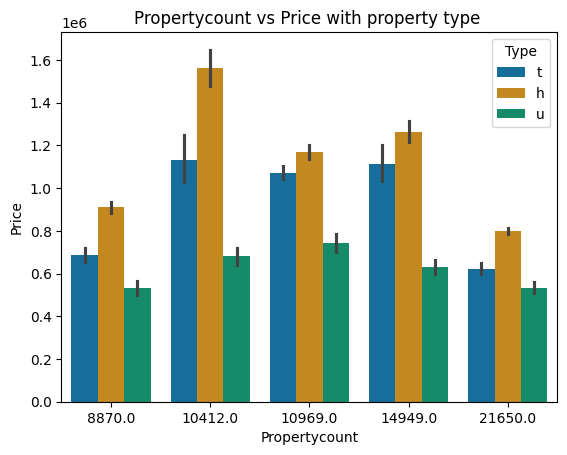

In [ ]:
new_Propertycount=[21650.0,8870.0,10969.0,14949.0,10412.0]

new_data=home.loc[home["Propertycount"].isin(new_Propertycount) & home["Price"]]

sns.barplot(data=new_data,x="Propertycount",y="Price",palette = 'colorblind',hue="Type")
plt.xlabel("Propertycount")
plt.ylabel("Price")
plt.title("Propertycount vs Price with property type ")
plt.show()



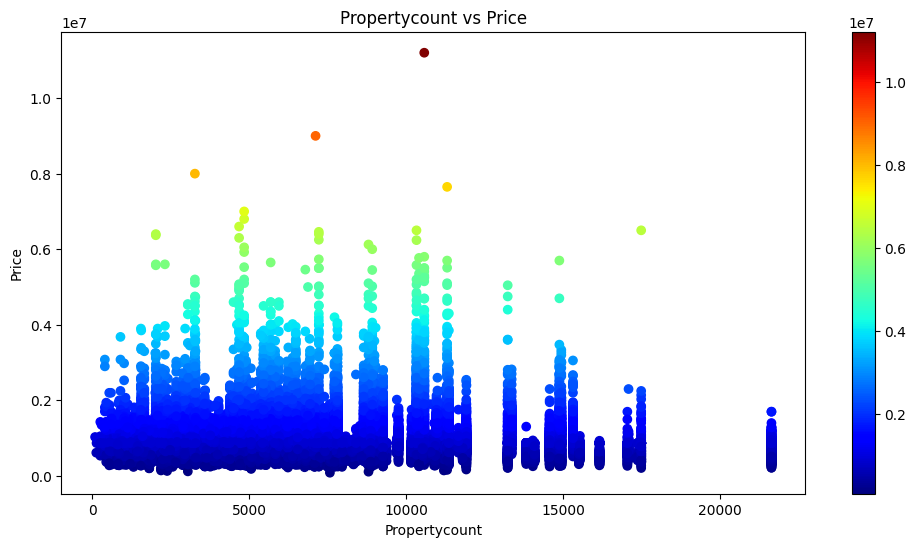

In [ ]:
#here we can esay to see due to property count more means more house for availble for sales there prices too-low

plt.figure(figsize=[12,6])
plt.scatter(home['Propertycount'], home['Price'],c=home["Price"],cmap="jet")
plt.xlabel('Propertycount')
plt.ylabel('Price')
plt.title('Propertycount vs Price')
plt.colorbar()
plt.show()

In [ ]:
home.sample(6)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_Year,Sold_Date,Sold_Month,Property_old_years
9596,St Kilda,4/27 Robe St,2,u,385000.0,VB,Harrington,6.1,3182.0,2.0,1.0,1.0,0.0,46.0,1970.0,Port Phillip City Council,-37.86480,144.97830,Southern Metropolitan,13240.0,2016.0,18,6,46
34441,MacLeod,33 Erskine Rd,4,h,835000.0,S,Ray,12.7,3085.0,3.0,2.0,2.0,521.0,136.0,1970.0,Banyule City Council,-37.80760,145.00780,Northern Metropolitan,4168.0,2018.0,24,2,48
30228,Coburg North,4 Ronald St,3,h,765000.0,S,Nelson,6.7,3058.0,3.0,2.0,2.0,521.0,207.0,1970.0,Darebin City Council,-37.73127,144.98105,Northern Metropolitan,3445.0,2017.0,9,12,47
3434,Coburg,9 Beckley St,3,h,1370000.0,S,Nelson,7.8,3058.0,3.0,1.0,1.0,563.0,130.0,1930.0,Darebin City Council,-37.74930,144.97800,Northern Metropolitan,11204.0,2016.0,28,5,86
12541,Canterbury,17 View St,3,h,3725000.0,S,Marshall,9.0,3126.0,3.0,2.0,2.0,857.0,250.0,1970.0,Boroondara City Council,-37.82030,145.07850,Southern Metropolitan,3265.0,2017.0,13,5,47
34829,West Melbourne,9/11 Anderson St,3,u,870000.0,S,hockingstuart,3.1,3003.0,3.0,2.0,2.0,521.0,136.0,1970.0,Melbourne City Council,-37.80760,145.00780,Northern Metropolitan,2230.0,2018.0,24,2,48


In [ ]:
home["Postcode"].value_counts()

,count
Postcode,
3073.0,844
3046.0,638
3020.0,617
3121.0,612
3165.0,583
...,...
3428.0,1
3770.0,1
3786.0,1


In [ ]:
home.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Sold_Year', 'Sold_Date', 'Sold_Month',
       'Property_old_years'],
      dtype='object')

In [ ]:
home_columns=['Address', 'Rooms', 'Type', 'Price',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Regionname', 'Sold_Year', 'Sold_Date', 'Sold_Month',
       'Property_old_years']

new_home=pd.DataFrame(home,columns=home_columns)

In [ ]:
new_home.drop("Address",axis=1,inplace=True)

In [ ]:
new_home["Regionname"].value_counts()

,count
Regionname,
Southern Metropolitan,11839
Northern Metropolitan,9557
Western Metropolitan,6799
Eastern Metropolitan,4377
South-Eastern Metropolitan,1739
Eastern Victoria,228
Northern Victoria,203
Western Victoria,115


In [ ]:
#doing One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop="first",sparse_output=False,dtype=np.int32)

new_Regionname=ohe.fit_transform(home[["Regionname"]])

new_Regionname


encoding_new=pd.DataFrame(new_Regionname,columns=ohe.get_feature_names_out(['Regionname']))

home2 = pd.concat([new_home, encoding_new], axis=1)


home2.shape

(34857, 25)

In [ ]:
# doing one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop="first",sparse_output=False,dtype=np.int32)

new_Type=ohe.fit_transform(home[["Type"]])

encoding_new_Type=pd.DataFrame(new_Type,columns=ohe.get_feature_names_out(['Type']))


encoding_new_Type


home3 = pd.concat([home2, encoding_new_Type], axis=1)

In [ ]:
home3.drop(["Type","Regionname"],axis=1,inplace=True)

In [ ]:
home3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  34857 non-null  int64  
 1   Price                                  34857 non-null  float64
 2   Distance                               34857 non-null  float64
 3   Postcode                               34857 non-null  float64
 4   Bedroom2                               34857 non-null  float64
 5   Bathroom                               34857 non-null  float64
 6   Car                                    34857 non-null  float64
 7   Landsize                               34857 non-null  float64
 8   BuildingArea                           34857 non-null  float64
 9   YearBuilt                              34857 non-null  float64
 10  Lattitude                              34857 non-null  float64
 11  Lo

In [ ]:
home3.isnull().sum()

,0
Rooms,0
Price,0
Distance,0
Postcode,0
Bedroom2,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0


In [ ]:
home3

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Sold_Year,Sold_Date,Sold_Month,Property_old_years,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u
0,2,870000.0,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,-37.80140,144.99580,2016.0,3,9,46,0,1,0,0,0,0,0,0,0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,-37.79960,144.99840,2016.0,3,12,46,0,1,0,0,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,2016.0,4,2,116,0,1,0,0,0,0,0,0,0
3,3,870000.0,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,-37.81140,145.01160,2016.0,4,2,46,0,1,0,0,0,0,0,0,1
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,2017.0,4,3,117,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,136.0,1970.0,-37.81053,144.88467,2018.0,24,2,48,0,0,0,0,0,1,0,0,0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,2018.0,24,2,0,0,0,0,0,0,1,0,0,0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,2018.0,24,2,18,0,0,0,0,0,1,0,1,0
34855,3,1140000.0,6.3,3013.0,3.0,2.0,2.0,521.0,136.0,1970.0,-37.80760,145.00780,2018.0,24,2,48,0,0,0,0,0,1,0,0,0


In [ ]:
home3.shape

(34857, 25)

In [ ]:
x=home3.drop('Price',axis=1)

In [ ]:
y=home3['Price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler

rb=RobustScaler()

sacling_traing=rb.fit_transform(x_train)

sacling_test=rb.transform(x_test)

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(sacling_traing,y_train)

LinearRegression()

In [ ]:
lr.score(sacling_traing,y_train)

0.39621162732676596

In [ ]:
lr.score(sacling_test,y_test)

0.28645331822917264

# Linear Regression Not work well

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor(max_depth=20, max_features=15, min_samples_split=300,
                    splitter='random' )

In [ ]:
dt.fit(sacling_traing,y_train)

DecisionTreeRegressor(max_depth=20, max_features=15, min_samples_split=300,
                      splitter='random')

In [ ]:
dt.score(sacling_traing,y_train)

0.44966217188841284

In [ ]:
dt.score(sacling_test,y_test)

0.3853742957658507

In [ ]:
y_pred_dt=dt.predict(sacling_test)

In [ ]:
r2_score(y_test,y_pred_dt)

0.3853742957658507

In [ ]:
mean_squared_error(y_test,y_pred_dt)

184632600521.2258

In [ ]:
mean_absolute_error(y_test,y_pred_dt)

264879.2785764561

In [ ]:
from sklearn.tree import plot_tree

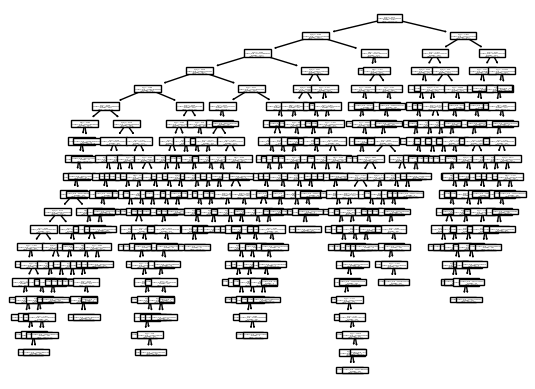

In [ ]:
plot_tree(dt)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dic ={'max_depth':[5,10,15,20,25],
      'min_samples_split':[50,100,150,200],
      'splitter':['random'],
      'max_features':[6,8,10,12,15]
}

In [ ]:
rsc=RandomizedSearchCV(dt,param_distributions=dic,cv=5)

In [ ]:
rsc.fit(sacling_traing,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=20,
                                                   max_features=15,
                                                   min_samples_split=150,
                                                   splitter='random'),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': [6, 8, 10, 12, 15],
                                        'min_samples_split': [50, 100, 150,
                                                              200],
                                        'splitter': ['random']})

In [ ]:
rsc.best_estimator_

DecisionTreeRegressor(max_depth=25, max_features=10, min_samples_split=200,
                      splitter='random')

# RandomForest and VotingRegressor and BaggingRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,BaggingRegressor

In [ ]:
rf= RandomForestRegressor(max_depth=50, max_features=10, min_samples_split=20,
                      n_estimators=300)

In [ ]:
rf.fit(sacling_traing,y_train)

RandomForestRegressor(max_depth=50, max_features=10, min_samples_split=20,
                      n_estimators=300)

In [ ]:
rf.score(sacling_traing,y_train)

0.7191911585040066

In [ ]:
rf.score(sacling_test,y_test)

0.45995164726530535

In [ ]:
y_pred_rf=rf.predict(sacling_test)

In [ ]:
r2_score(y_test,y_pred_rf)

0.4586202431036469

In [ ]:
mean_squared_error(y_test,y_pred_rf)

162629632468.54883

In [ ]:
mean_absolute_error(y_test,y_pred_rf)

237637.78520962183

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dics ={
    'n_estimators': [150, 200, 300],
    'max_depth': [5,10,15,20,25,50,100],
    'min_samples_split': [5, 10, 20, 50, 100],
    'max_features': ['sqrt', 'log2', 10],
    'bootstrap': [True]
}

In [ ]:
rs=RandomizedSearchCV(rf,param_distributions=dics,cv=5)

In [ ]:
rs.fit(sacling_traing,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=100,
                                                   max_features=18,
                                                   min_samples_split=100,
                                                   n_estimators=300),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15, 20, 25, 50,
                                                      100],
                                        'max_features': ['sqrt', 'log2', 10],
                                        'min_samples_split': [5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [150, 200, 300]})

In [ ]:
rs.best_estimator_

RandomForestRegressor(max_depth=50, max_features=10, min_samples_split=20,
                      n_estimators=300)

In [ ]:
rs.best_score_

0.49150156256953415

#VotingRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
lr=LinearRegression()
rf= RandomForestRegressor(max_depth=50, max_features=10, min_samples_split=20,
                      n_estimators=300)
dt=DecisionTreeRegressor(max_depth=800, max_features=25, min_samples_split=150,
                      splitter='random')
knn=KNeighborsRegressor(n_neighbors=7)

In [ ]:
vr=VotingRegressor(estimators=[('lr',lr),('rf',rf),('dt',dt),('knn',knn)])

In [ ]:
vr.fit(sacling_traing,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_depth=50,
                                                   max_features=10,
                                                   min_samples_split=20,
                                                   n_estimators=300)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=800,
                                                   max_features=25,
                                                   min_samples_split=150,
                                                   splitter='random')),
                            ('knn', KNeighborsRegressor(n_neighbors=7))])

In [ ]:
vr.score(sacling_traing,y_train)

0.5793599036923218

In [ ]:
vr.score(sacling_test,y_test)

0.45072670208109955

In [ ]:
y_pred_vr=vr.predict(sacling_test)

In [ ]:
r2_score(y_test,y_pred_vr)

0.45072670208109955

In [ ]:
mean_squared_error(y_test,y_pred_vr)

165000839849.3561

In [ ]:
x_train.shape

(27885, 24)

#BaggingRegressor

In [ ]:
br=BaggingRegressor(estimator=RandomForestRegressor(max_depth=100, max_features=18, min_samples_split=100),n_estimators=50)

In [ ]:
br.fit(sacling_traing,y_train)

BaggingRegressor(estimator=RandomForestRegressor(max_depth=100, max_features=18,
                                                 min_samples_split=100),
                 n_estimators=50)

In [ ]:
br.score(sacling_traing,y_train)

0.5397386836833735

In [ ]:
br.score(sacling_test,y_test)

0.45989416029233354

In [ ]:
y_pred_br=br.predict(sacling_test)

In [ ]:
r2_score(y_test,y_pred_br)

0.45989416029233354

In [ ]:
mean_squared_error(y_test,y_pred_br)

162246949736.96832

In [ ]:
mean_absolute_error(y_test,y_pred_br)

243477.56210879132

#XGBRegressor

In [ ]:
from xgboost import XGBRegressor


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42,min_child_weight=5,reg_alpha=1,reg_lambda=10)
xgb_model.fit(sacling_traing, y_train)

# Predictions
y_pred = xgb_model.predict(sacling_test)



In [ ]:
xgb_model.score(sacling_traing,y_train)

0.755766396149881

In [ ]:
xgb_model.score(sacling_test,y_test)

0.4368106570518928

In [ ]:
# Metrics
mean_squared_error(y_test, y_pred)


169181198016.9574

In [ ]:
 mean_absolute_error(y_test, y_pred)


239066.90165573006

In [ ]:
r2_score(y_test, y_pred)

0.4368106570518928

# deployment all model and got r2_score around 0.45 and mean absolute error and mean squared error similar